# Task 0
## Exercise 4 completed by WingKi Yu

# D. DASK DATAFRAMES IN CODE – NYC AREA FLIGHTS DATA

## 1. Install and Imports

In [1]:
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

## 2. Get the data and read it in

In [2]:
filename = os.path.join('nycflights','*.csv')
filename

'nycflights/*.csv'

In [3]:
ddf = dd.read_csv(filename)

In [4]:
pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

## 3. Lazy operations

In [5]:
ddf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## 4. Timing exercise 

In [6]:
%timeit ddf = dd.read_csv(filename)

5.04 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit pdf = pd.concat(map(pd.read_csv, glob.glob('nycflights/*.csv')))

4.66 s ± 810 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 5. DataFrame attributes

In [8]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [9]:
ddf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

## 6. Read in the data again

In [10]:
ddf = dd.read_csv(filename,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'CRSElapsedTime': 'float64',
                       'TailNum': 'object'})

In [11]:
len(ddf)


2611892

In [12]:
ddf.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [13]:
ddf[['CRSElapsedTime', 'TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
243797,242.0,NaN
150564,140.0,NaN
154852,154.0,NaN
158997,108.0,NaN
205010,77.0,NaN
...,...,...
266592,96.0,N13331
37421,147.0,N2812W
173103,130.0,N904DL
226309,389.0,N54241


## 7. Obtaining a Dask Series and indexing Dask DataFrames

In [14]:
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [15]:
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [16]:
ddf.iloc[:,[1, 3,]].compute()

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


In [17]:
#ddf.iloc[[1, 3,]].compute()

## 8. Converting from Pandas to Dask

In [18]:
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## 9. Computations on Dask DataFrames


### Task a

In [19]:
ddf.count().compute()

Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

### Task b

In [20]:
ddf['Cancelled'].value_counts().compute()

0    2540961
1      70931
Name: Cancelled, dtype: int64

### Task c

In [21]:
ddf['DepDelay'].max().compute()

1435.0

### Task d

In [22]:
ddf[ddf['Cancelled'] == 1].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


### Task e

In [23]:
ddf[ddf['DayOfWeek'] == 1].count().compute()

Date                 388011
DayOfWeek            388011
DepTime              377343
CRSDepTime           388011
ArrTime              376343
CRSArrTime           388011
UniqueCarrier        388011
FlightNum            388011
TailNum              192941
ActualElapsedTime    376343
CRSElapsedTime       387624
AirTime              186140
ArrDelay             376343
DepDelay             377343
Origin               388011
Dest                 388011
Distance             387783
TaxiIn               192941
TaxiOut              192941
Cancelled            388011
Diverted             388011
dtype: int64

### Task f

In [24]:
ddf[['Origin', 'Cancelled']].loc[ddf['Cancelled'] == 0].groupby('Origin').count().compute()

,Cancelled
Origin,
EWR,1139451
JFK,427243
LGA,974267


### Task g

In [25]:
ddf.groupby(['Origin', 'DayOfWeek'])['DepDelay'].mean().compute()

Origin  DayOfWeek
EWR     1             9.115922
        2             9.179402
        3            10.606154
        4            12.069740
        5            13.154202
        6             8.053139
        7             9.432185
JFK     1             8.884113
        2             8.841036
        3             9.448858
        4            10.846967
        5            12.339922
        6            11.191893
        7            10.947545
LGA     1             6.580465
        2             6.659778
        3             7.311600
        4             8.620151
        5             9.151866
        6             5.800159
        7             7.589457
Name: DepDelay, dtype: float64

### Task h

In [26]:
numcols = ddf.select_dtypes(include='number').columns
numcols

ddf[ddf['Dest'].isin(['JFK', 'EWR', 'LGA'])].groupby('Dest')[numcols].mean().compute()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### Task i

In [27]:
ddf[['ActualElapsedTime', 'Distance', 'Date']].groupby(ddf['Date'].dt.year).mean().compute()

,ActualElapsedTime,Distance
Date,,
1990,148.108649,815.490565
1991,146.681728,819.447871
1992,150.943364,837.750969
1993,154.939719,862.320965
1994,154.395917,860.493017
1995,163.409675,950.021784
1996,169.430025,965.890125
1997,171.839218,983.892431
1998,178.071539,1018.454424


## 10. Visualizing Dask Task Graphs

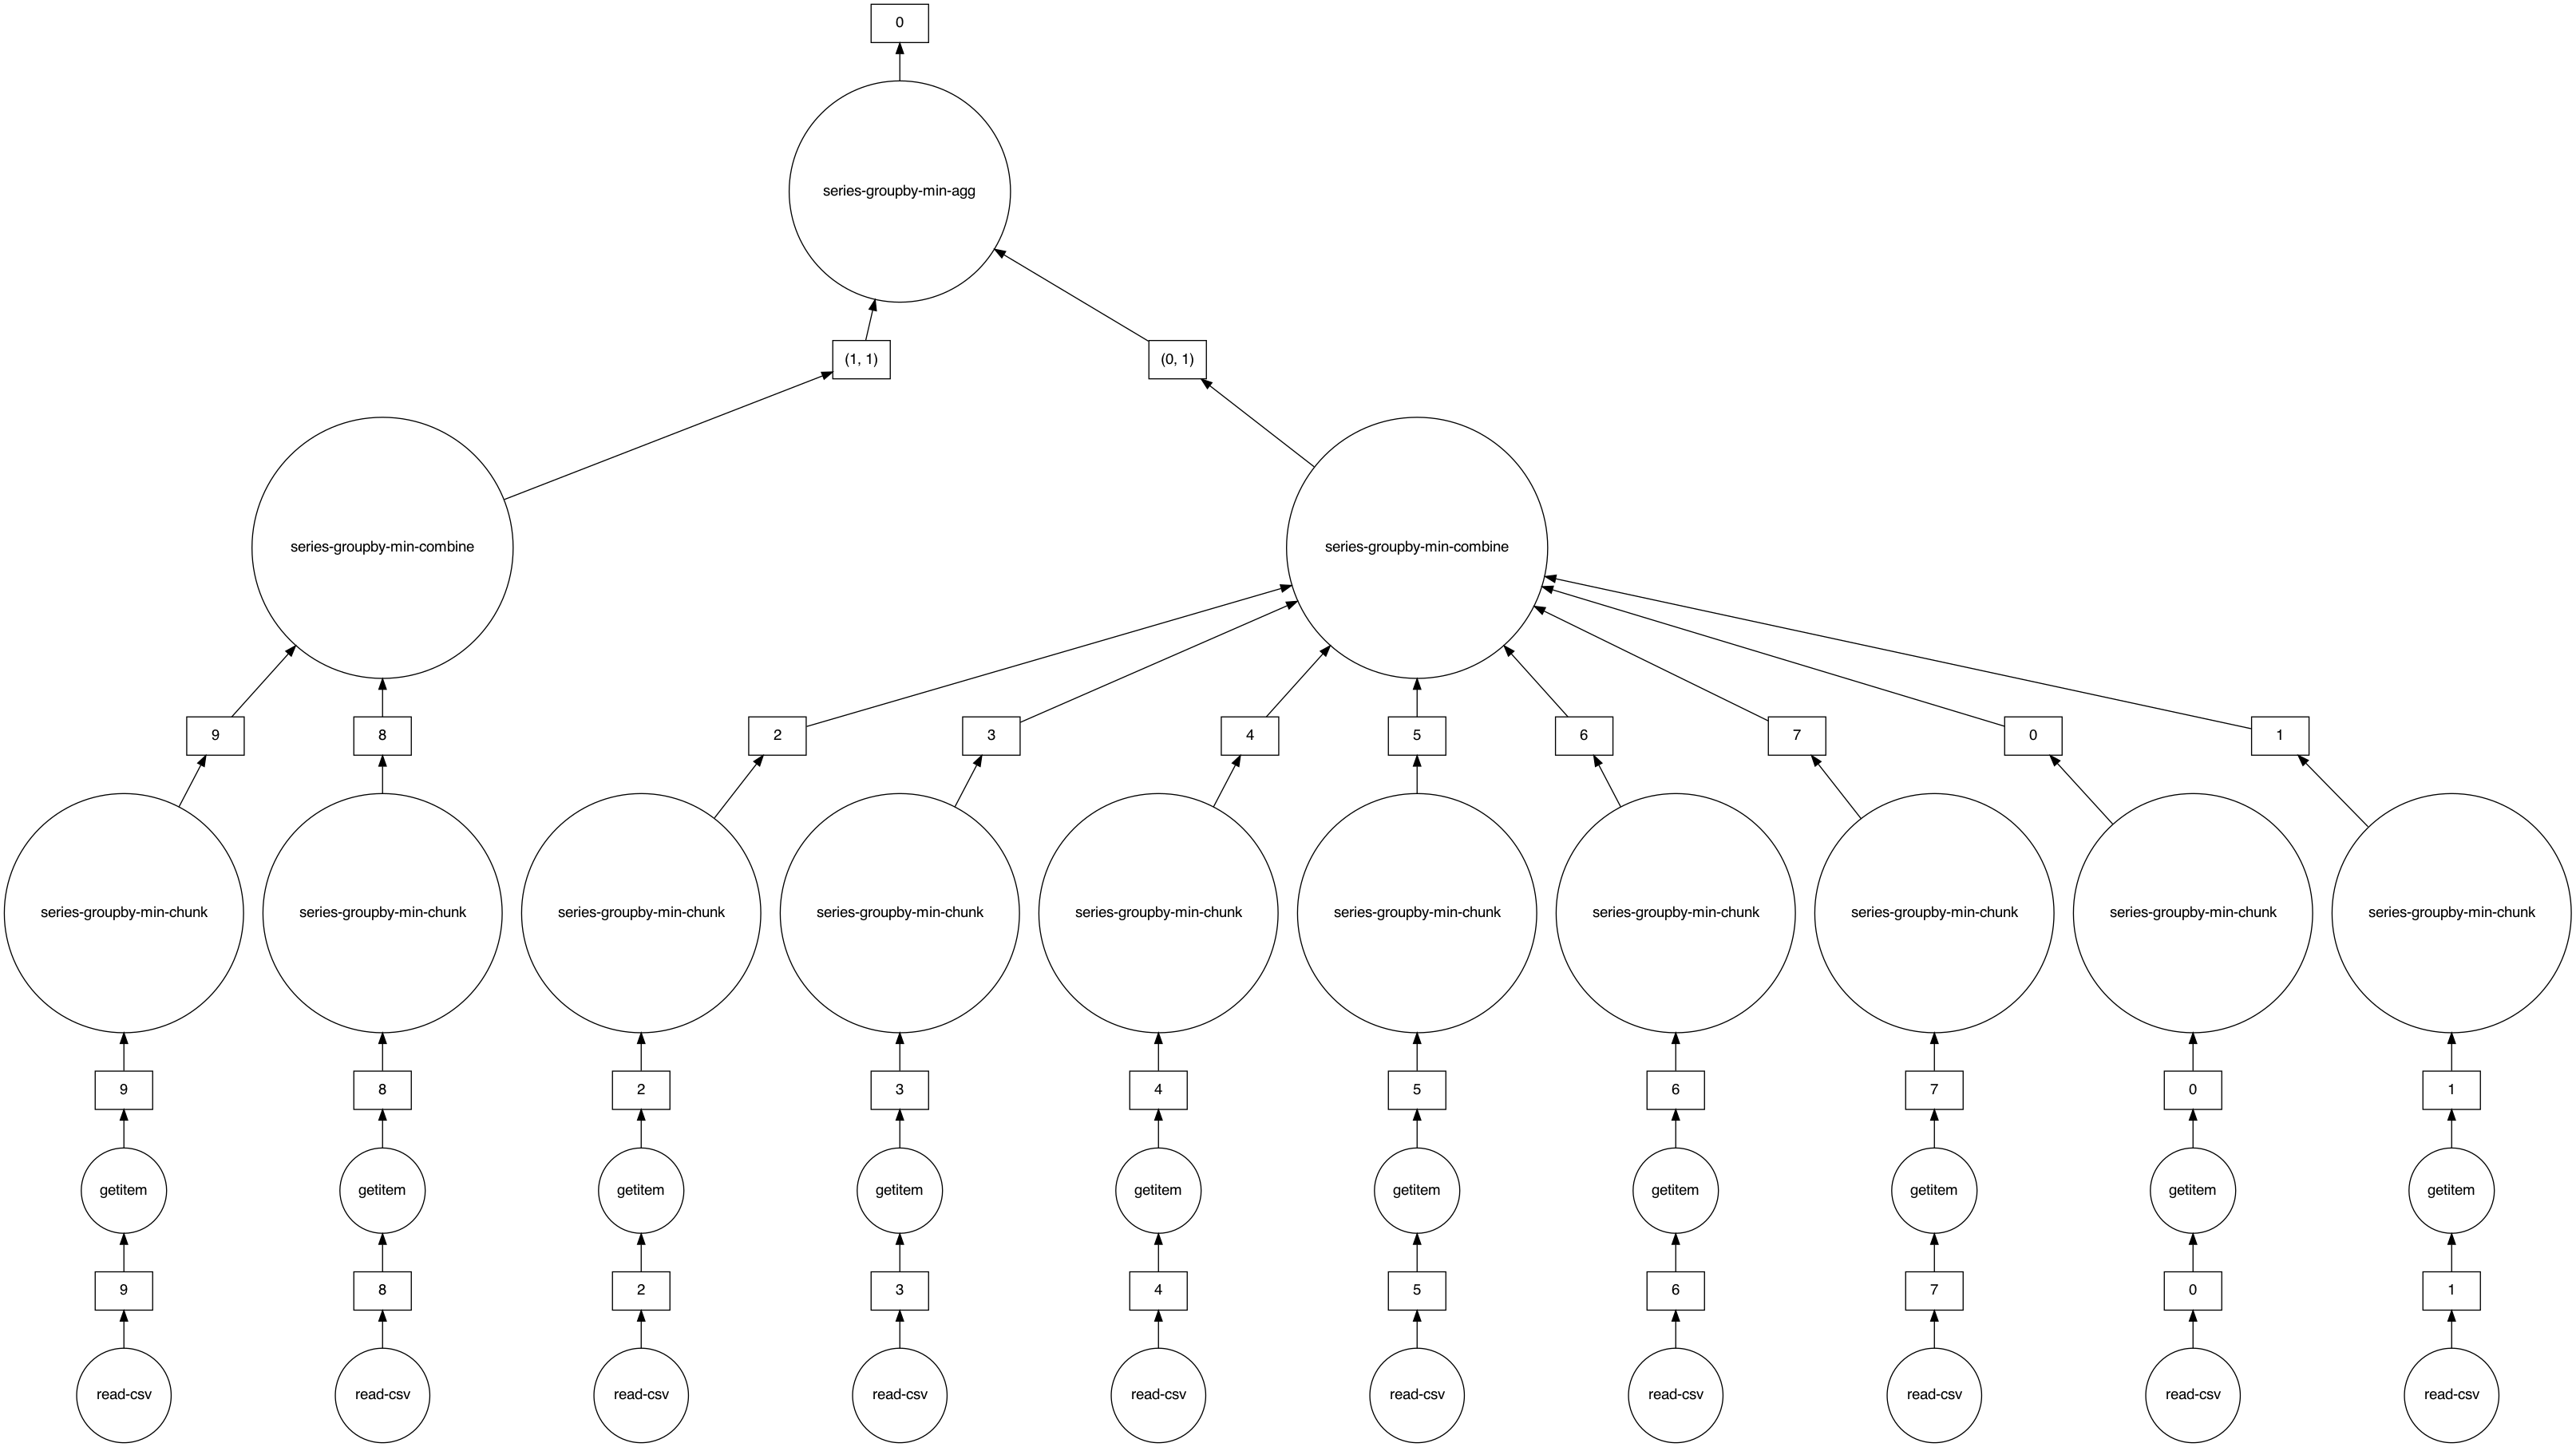

In [28]:
ddf.groupby('Dest')['ArrDelay'].min().visualize()

## 11. Use Distributed Task Scheduler: Set up a cluster and ProgressBar for diagnostics

In [29]:
from dask.distributed import Client

In [30]:
client = Client(n_workers = 4, threads_per_worker=2, memory_limit = '1GB')
print(client)
client.cluster

<Client: 'tcp://127.0.0.1:49487' processes=4 threads=8, memory=3.73 GiB>


LocalCluster(959b76e0, 'tcp://127.0.0.1:49487', workers=4, threads=8, memory=3.73 GiB)

In [31]:
ddf.groupby('Dest')['ArrDelay'].min().compute()

Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [32]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

## 12. Using a different scheduler for specific tasks

In [33]:
x = ddf.groupby('Dest')['ArrDelay'].min()

x.compute(scheduler='threads')

[                                        ] | 0% Completed | 114.44 ms

/Users/wingki/opt/anaconda3/envs/daskpy/lib/python3.9/site-packages/dask/base.py:1366: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


[########################################] | 100% Completed | 3.91 ss


Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64

In [34]:
with dask.config.set(scheduler='processes'):
    print(x.compute())

[                                        ] | 0% Completed | 2.44 ms

/Users/wingki/opt/anaconda3/envs/daskpy/lib/python3.9/site-packages/dask/base.py:1366: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


[########################################] | 100% Completed | 4.73 ss
Dest
ABE    -33.0
ALB    -26.0
ATL   -311.0
BDL    -39.0
BGR    -30.0
       ...  
AUS    -65.0
CRP    -16.0
HNL    -63.0
BHM    -30.0
TUS    -55.0
Name: ArrDelay, Length: 99, dtype: float64


# E. MACHINE LEARNING WITH DASK

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 10000, n_features=4, random_state=0)

In [36]:
X[:8]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 1.68616989,  1.6329131 , -1.42072654,  1.04050557],
       [-0.93912893, -1.02270838,  1.10093827, -0.63714432]])

In [37]:
y[:8]

array([0, 0, 1, 0, 0, 0, 0, 1])

### 2. Fit a SupportVector Classifier

In [38]:
from sklearn.svm import SVC

In [39]:
estimator = SVC(random_state=42)
estimator.fit(X, y)

SVC(random_state=42)

In [40]:
estimator.support_vectors_[:5]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 0.06135861, -0.32391974,  0.99651845, -0.15720499]])

In [41]:
estimator.score(X, y)

0.905

### 3. Setting Hyperparameters

In [42]:
estimator = SVC(C=0.00001, shrinking=False, random_state=0)
estimator.fit(X, y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [43]:
estimator.score(X, y)

0.5007

### 4. Applying GridSearchCV on a single core

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
estimator = SVC(gamma='auto', probability=True, random_state=42)

param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly', 'linear'],
}

In [46]:
grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)

In [47]:
%time grid_search.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=0.001, kernel=rbf; total time=  11.6s
[CV] END ................................C=0.001, kernel=rbf; total time=  11.5s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END .............................C=0.001, kernel=linear; total time=   3.1s
[CV] END .............................C=0.001, kernel=linear; total time=   3.1s
[CV] END .................................C=10.0, kernel=rbf; total time=   3.0s
[CV] END .................................C=10.0, kernel=rbf; total time=   2.9s
[CV] END ................................C=10.0, kernel=poly; total time=   3.2s
[CV] END ................................C=10.0, kernel=poly; total time=   2.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.4s
[CV] END ..............................C=10.0, ke

GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

### 5. Applying GridSearchCV on multi-cores (native Scikit parallelism using Joblib)

In [48]:
import os

n_cpu = os.cpu_count()
print('Number of CPUs in the system:', n_cpu)

Number of CPUs in the system: 8


In [49]:
grid_search_MC = GridSearchCV(estimator,
                             param_grid,
                             verbose=2,
                             cv=2,
                             n_jobs=-1)

In [50]:
%time grid_search_MC.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
CPU times: user 11.3 s, sys: 950 ms, total: 12.2 s
Wall time: 29.9 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [51]:
grid_search_MC.best_params_, grid_search_MC.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9086000000000001)

### 6. Parallelism with Dask (can use single or multi-machine) 

In [52]:
import joblib

In [53]:
param_grid = {
    'C': [0.001, 0.1, 1.0, 2.5, 5., 10.0, 100., 500., 1000.],
    'kernel': ['rbf', 'poly', 'linear'],
    'shrinking': [True, False],
}

grid_search_Dist = GridSearchCV(estimator,
                               param_grid,
                               verbose=2,
                               cv=5,
                               n_jobs=-1)

In [54]:
%%time

with joblib.parallel_backend('dask'):
    grid_search_Dist.fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ...............................C=0.001, kernel=poly; total time=  10.7s
[CV] END ...............................C=0.001, kernel=poly; total time=  11.6s
[CV] END .................................C=10.0, kernel=rbf; total time=   6.2s
[CV] END ................................C=10.0, kernel=poly; total time=   6.9s
[CV] END .................................C=10.0, kernel=rbf; total time=   6.1s
[CV] END ................................C=10.0, kernel=poly; total time=   7.3s
[CV] END .............................C=0.001, kernel=linear; total time=   6.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.0s
[CV] END .............................C=0.001, kernel=linear; total time=   9.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.0s
[CV] END ................................C=0.001, kernel=rbf; total time=  18.8s
[CV] END ................................C=0.00

In [55]:
pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,43.111242,0.906340,3.973345,0.242783,0.001,rbf,True,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': True}",0.8495,0.821,0.8350,0.8245,0.8320,0.8324,0.009917,33
1,41.012281,0.737053,3.899985,0.194721,0.001,rbf,False,"{'C': 0.001, 'kernel': 'rbf', 'shrinking': False}",0.8495,0.821,0.8345,0.8245,0.8320,0.8323,0.009892,34
2,18.635887,0.513315,0.736759,0.047154,0.001,poly,True,"{'C': 0.001, 'kernel': 'poly', 'shrinking': True}",0.8095,0.785,0.8030,0.7975,0.8080,0.8006,0.008862,53
3,16.920661,1.198506,0.688914,0.018030,0.001,poly,False,"{'C': 0.001, 'kernel': 'poly', 'shrinking': Fa...",0.8095,0.785,0.8030,0.7980,0.8075,0.8006,0.008749,53
4,12.416099,0.352849,0.489586,0.010979,0.001,linear,True,"{'C': 0.001, 'kernel': 'linear', 'shrinking': ...",0.8390,0.813,0.8260,0.8120,0.8205,0.8221,0.009881,51


In [57]:
grid_search_Dist.best_params_, grid_search_Dist.best_score_

({'C': 500.0, 'kernel': 'rbf', 'shrinking': True}, 0.914)

In [58]:
y_pred = grid_search_Dist.predict(X)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4993
           1       0.88      0.96      0.92      5007

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### 7. Close the Client

In [60]:
client.shutdown()

[CV] END ...............C=0.001, kernel=poly, shrinking=True; total time=  19.4s
[CV] END ...............C=0.001, kernel=rbf, shrinking=False; total time=  45.6s
[CV] END ...............C=0.001, kernel=poly, shrinking=True; total time=  18.8s
[CV] END ................C=0.001, kernel=rbf, shrinking=True; total time=  46.4s
[CV] END .............C=0.001, kernel=linear, shrinking=True; total time=  13.6s
[CV] END ............C=0.001, kernel=linear, shrinking=False; total time=  13.2s
[CV] END ..................C=0.1, kernel=rbf, shrinking=True; total time=  16.2s
[CV] END ................C=0.001, kernel=rbf, shrinking=True; total time=  47.1s
[CV] END .................C=0.1, kernel=poly, shrinking=True; total time=  11.7s
[CV] END .................C=0.1, kernel=rbf, shrinking=False; total time=  16.8s
[CV] END ................C=0.1, kernel=poly, shrinking=False; total time=  12.0s
[CV] END ................C=0.1, kernel=poly, shrinking=False; total time=  12.0s
[CV] END ..............C=0.1